In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Edunet_Foundation/btcNewsToPrice.csv')
df.head()


,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_13,top_14,top_15,top_16,top_17,top_18,price,open,high,low
0,2015-07-01,Australia Plays Centralized Role in Banning Mo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,257.6,264.1,265.0,254.4
1,2015-07-02,Digital Technology to Exponentially Disrupt Bu...,Bitcoin Is A Better Way of Transferring Value ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,254.9,257.6,261.3,253.1
2,2015-07-03,How Will Credit Work in a Bitcoin Economy?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,255.4,254.9,256.7,252.4
3,2015-07-04,Improper Network Block Validation Leads to Adv...,MasterCard Tests Facial Recognition Technology...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,260.5,255.4,261.1,253.4
4,2015-07-05,"Bitcoin Documentaries Are Oudated, Time to Tak...","Global Arena Holding, Inc to Acquire Blockchai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,270.1,260.5,274.1,257.6


In [6]:
df.shape


(2169, 24)

In [7]:
df.describe()


,price,open,high,low
count,2169.000000,2169.000000,2169.000000,2169.000000
mean,8703.441540,8687.204564,8953.196312,8387.575426
std,12154.712336,12142.205973,12544.055708,11667.853971
min,211.400000,211.400000,226.600000,196.300000
25%,829.200000,827.300000,874.700000,808.600000
50%,6389.100000,6386.600000,6513.100000,6255.900000
75%,9585.200000,9580.300000,9773.200000,9343.000000
max,63540.900000,63544.200000,64778.000000,62067.500000


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2169 non-null   object 
 1   top_0   2169 non-null   object 
 2   top_1   2145 non-null   object 
 3   top_2   2043 non-null   object 
 4   top_3   1777 non-null   object 
 5   top_4   1478 non-null   object 
 6   top_5   1192 non-null   object 
 7   top_6   972 non-null    object 
 8   top_7   768 non-null    object 
 9   top_8   622 non-null    object 
 10  top_9   481 non-null    object 
 11  top_10  356 non-null    object 
 12  top_11  220 non-null    object 
 13  top_12  142 non-null    object 
 14  top_13  92 non-null     object 
 15  top_14  57 non-null     object 
 16  top_15  34 non-null     object 
 17  top_16  18 non-null     object 
 18  top_17  5 non-null      object 
 19  top_18  1 non-null      object 
 20  price   2169 non-null   float64
 21  open    2169 non-null   float64
 22  

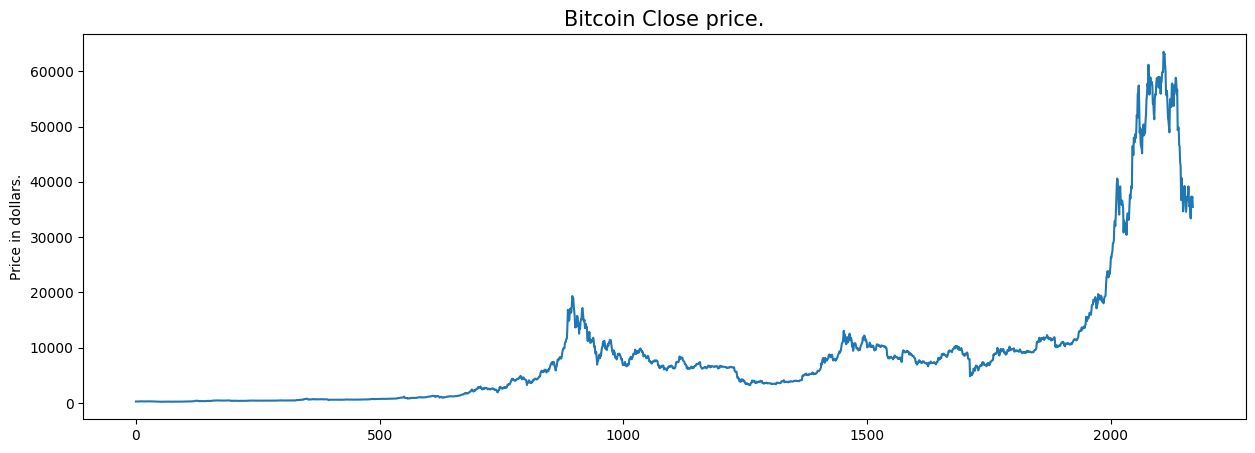

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(df['price'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [10]:
#df[df['Close'] == df['Open']].shape, df.shape

In [11]:
#df = df.drop(['open'], axis=1)


In [12]:
df.isnull().sum()


date         0
top_0        0
top_1       24
top_2      126
top_3      392
top_4      691
top_5      977
top_6     1197
top_7     1401
top_8     1547
top_9     1688
top_10    1813
top_11    1949
top_12    2027
top_13    2077
top_14    2112
top_15    2135
top_16    2151
top_17    2164
top_18    2168
price        0
open         0
high         0
low          0
dtype: int64

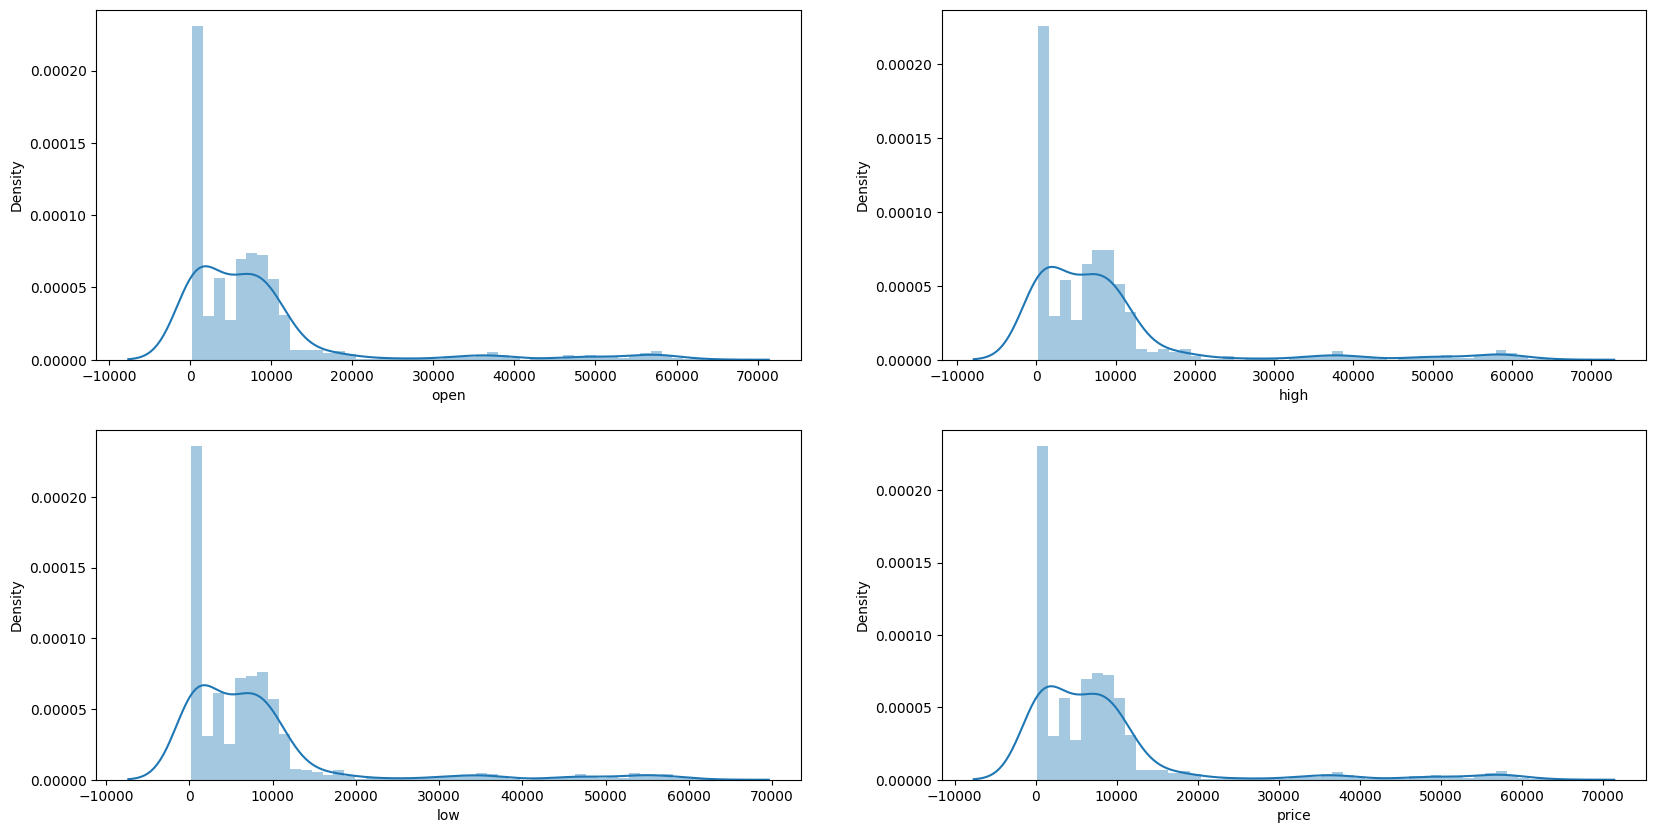

In [13]:
features = ['open', 'high', 'low', 'price']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()


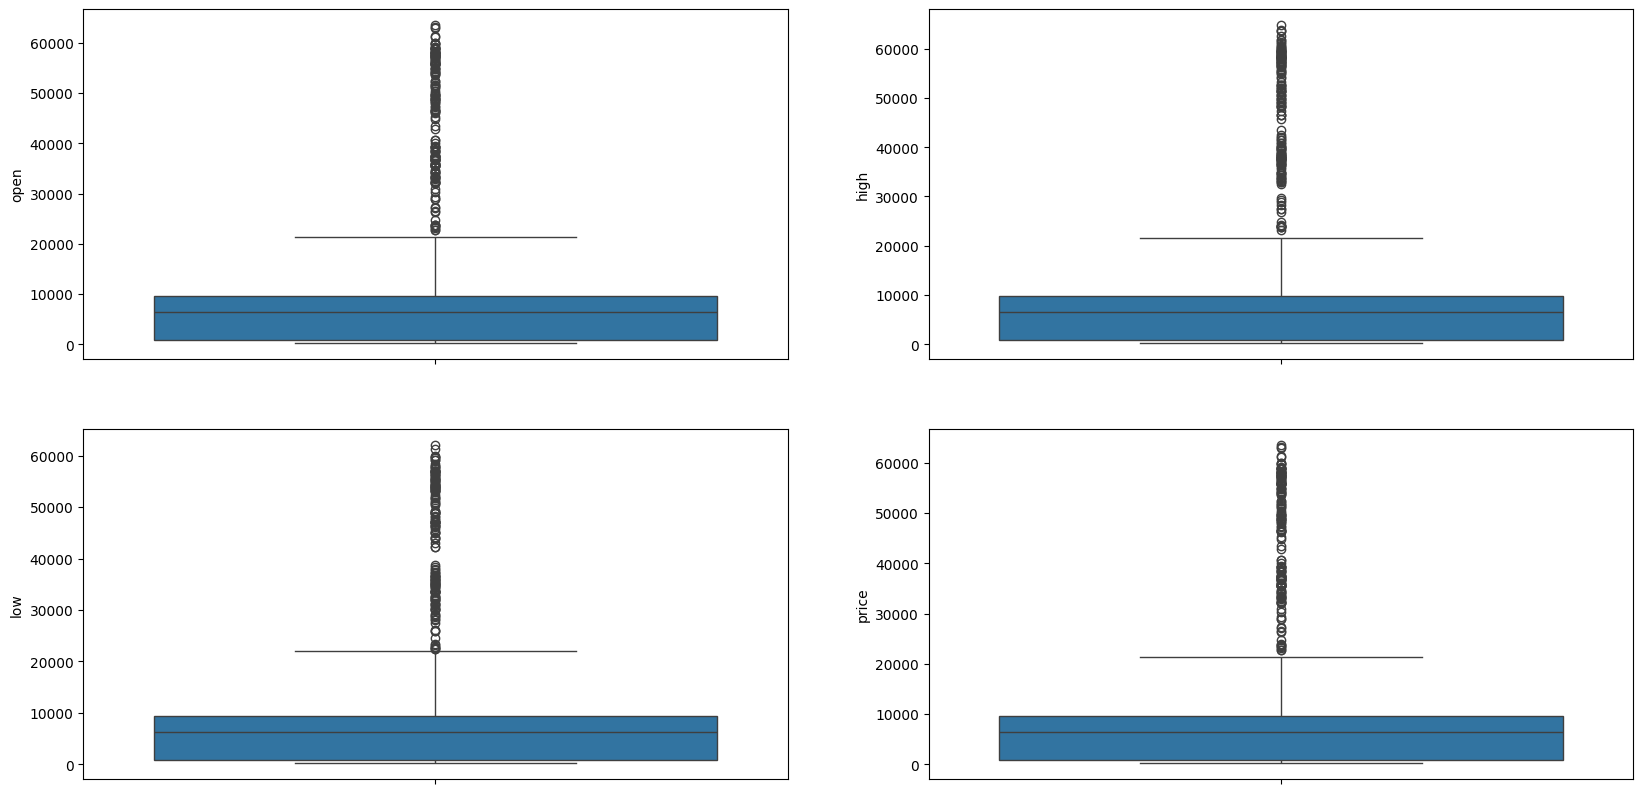

In [14]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()


In [15]:
splitted = df['date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()


,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_16,top_17,top_18,price,open,high,low,year,month,day
0,2015-07-01,Australia Plays Centralized Role in Banning Mo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,257.6,264.1,265.0,254.4,2015,7,1
1,2015-07-02,Digital Technology to Exponentially Disrupt Bu...,Bitcoin Is A Better Way of Transferring Value ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,254.9,257.6,261.3,253.1,2015,7,2
2,2015-07-03,How Will Credit Work in a Bitcoin Economy?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,255.4,254.9,256.7,252.4,2015,7,3
3,2015-07-04,Improper Network Block Validation Leads to Adv...,MasterCard Tests Facial Recognition Technology...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,260.5,255.4,261.1,253.4,2015,7,4
4,2015-07-05,"Bitcoin Documentaries Are Oudated, Time to Tak...","Global Arena Holding, Inc to Acquire Blockchai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,270.1,260.5,274.1,257.6,2015,7,5


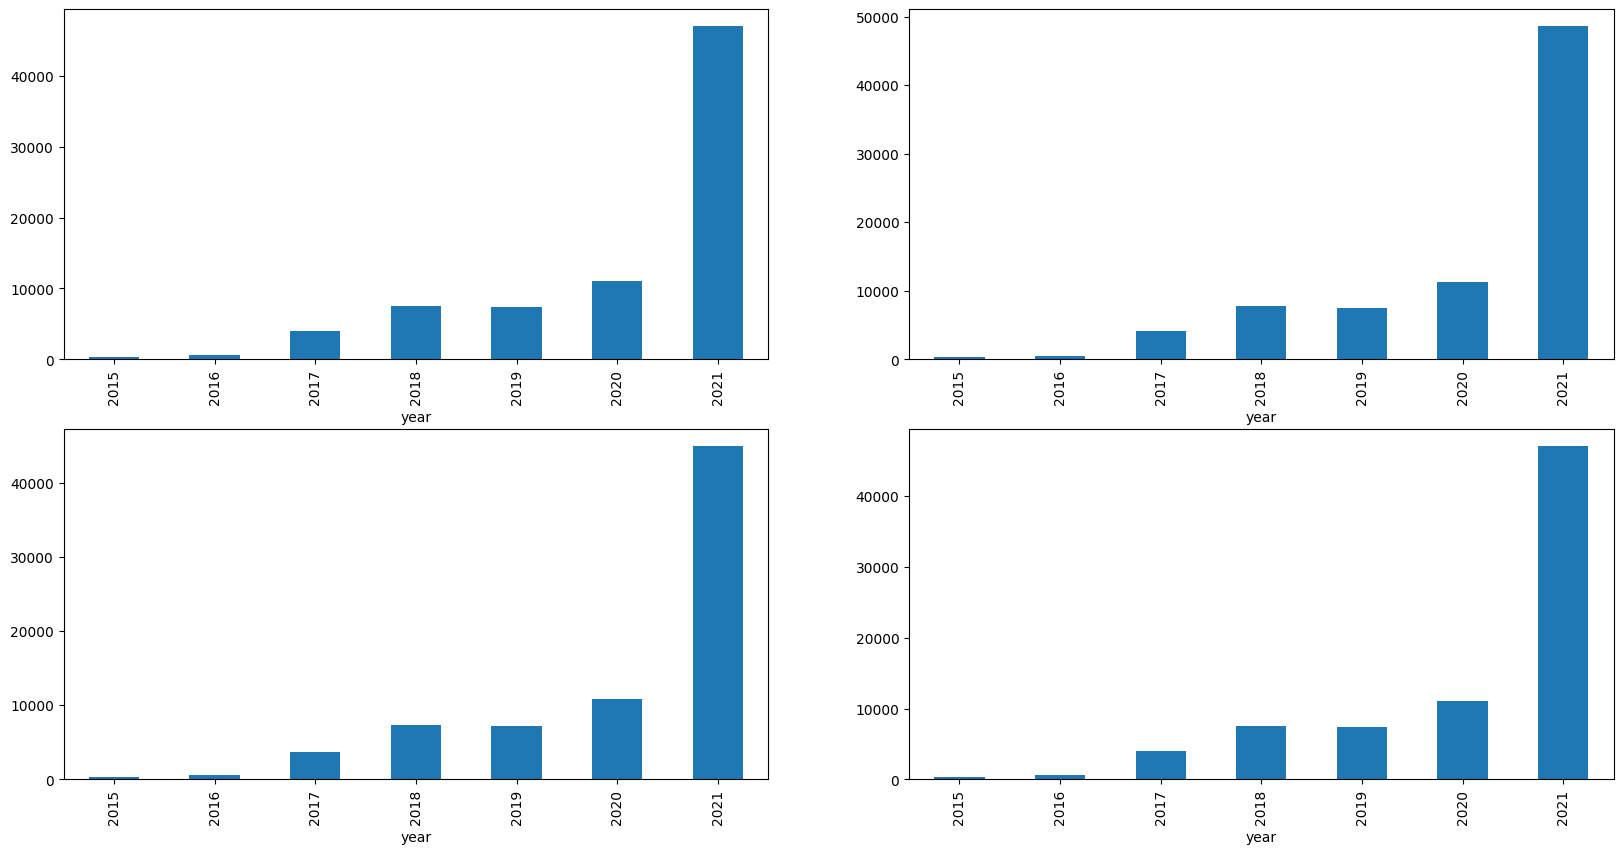

In [16]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['open', 'high', 'low', 'price']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [17]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_17,top_18,price,open,high,low,year,month,day,is_quarter_end
0,2015-07-01,Australia Plays Centralized Role in Banning Mo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,257.6,264.1,265.0,254.4,2015,7,1,0
1,2015-07-02,Digital Technology to Exponentially Disrupt Bu...,Bitcoin Is A Better Way of Transferring Value ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,254.9,257.6,261.3,253.1,2015,7,2,0
2,2015-07-03,How Will Credit Work in a Bitcoin Economy?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,255.4,254.9,256.7,252.4,2015,7,3,0
3,2015-07-04,Improper Network Block Validation Leads to Adv...,MasterCard Tests Facial Recognition Technology...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,260.5,255.4,261.1,253.4,2015,7,4,0
4,2015-07-05,"Bitcoin Documentaries Are Oudated, Time to Tak...","Global Arena Holding, Inc to Acquire Blockchai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,270.1,260.5,274.1,257.6,2015,7,5,0


In [18]:
df['open-close'] = df['open'] - df['price']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['price'].shift(-1) > df['price'], 1, 0)


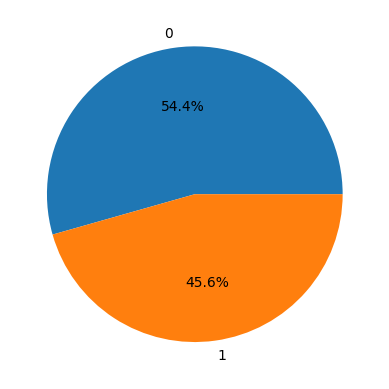

In [19]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


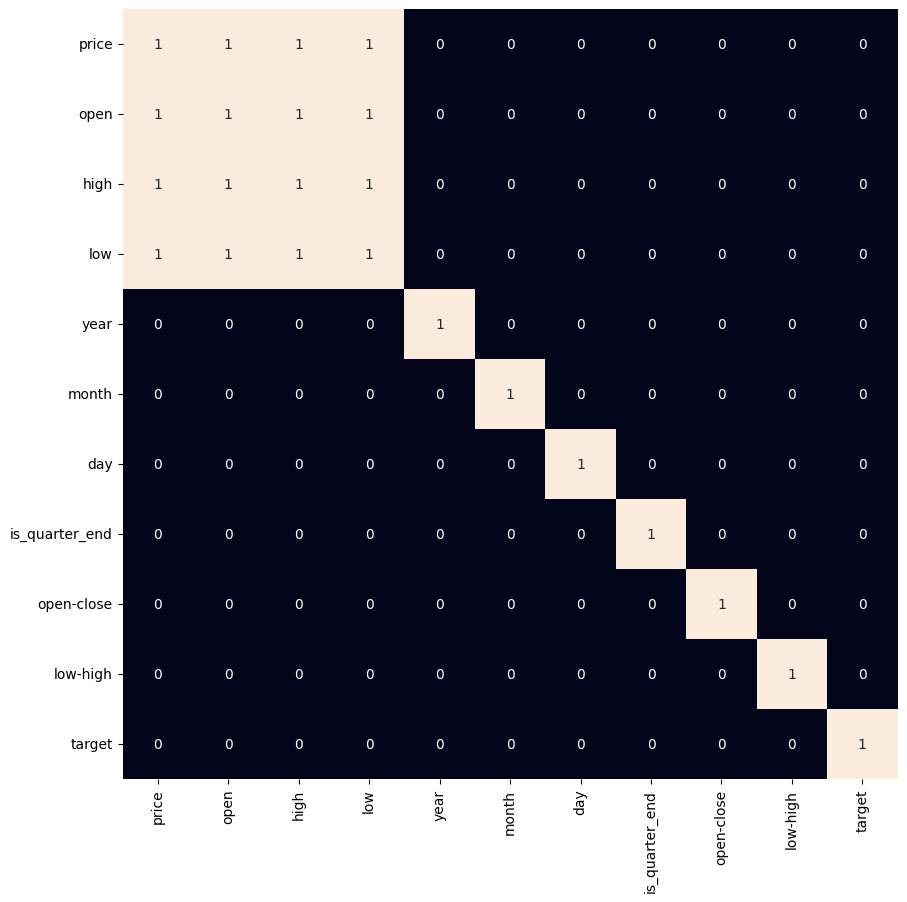

In [20]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [21]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(1952, 3) (217, 3)


In [22]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5375957360094425
Validation Accuracy :  0.5366581415174766

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5331216158280007
Validation Accuracy :  0.577152600170503

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training A

In [23]:
from sklearn.metrics import confusion_matrix
for i in range(3):
  lr=models[i]
  lr.fit(X_train,Y_train)
  y_pred = lr.predict(X_valid)
  cn=confusion_matrix(Y_valid,y_pred)
  print(cn)

[[  4  98]
 [  4 111]]
[[  1 101]
 [  1 114]]
[[48 54]
 [50 65]]
